# Player Valuation Analysis

The purpose of this notebook is to investigate player valuation (according to salary), and to see which players are being undervalued, fairly valued, and overvalued. 

## Data
The data is from ESPN.com.

Data definitions: http://www.espn.com/editors/nba/glossary.html.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path_to_datasets = '../Datasets/'
espn_player_path = path_to_datasets+'nba_player_stats.csv'
espn_salary_path = path_to_datasets+'player_salaries.csv'

espn_player = pd.read_csv(espn_player_path)
espn_salary = pd.read_csv(espn_salary_path)

## Data exploration

In [3]:
espn_player.head()

,PNAME,YEAR,GP,GS,MIN,FG,FG%,3PT,3P%,FT,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
0,kemba-walker,2011,66,25,27.2,4.3-11.6,36.6,1.0-3.4,30.5,2.5-3.2,78.9,0.5,3.1,3.5,4.4,0.3,0.9,1.2,1.8,12.1
1,kemba-walker,2012,82,82,34.9,6.4-15.2,42.3,1.3-4.0,32.2,3.6-4.5,79.8,0.7,2.7,3.5,5.7,0.4,2.0,1.9,2.4,17.7
2,kemba-walker,2013,73,73,35.8,6.2-15.7,39.3,1.5-4.5,33.3,3.9-4.6,83.7,0.5,3.7,4.2,6.1,0.4,1.2,1.8,2.3,17.7
3,kemba-walker,2014,62,58,34.2,6.1-15.8,38.5,1.4-4.5,30.4,3.8-4.6,82.7,0.6,3.0,3.5,5.1,0.5,1.4,1.5,1.6,17.3
4,kemba-walker,2015,81,81,35.6,7.0-16.4,42.7,2.2-6.0,37.1,4.6-5.4,84.7,0.7,3.7,4.4,5.2,0.5,1.6,1.4,2.1,20.9


In [4]:
espn_player.describe()

,YEAR,GP,GS,MIN,FG%,3P%,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
count,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000
mean,2015.416332,53.942399,30.702515,23.273205,45.300328,29.211010,73.155669,1.021874,3.198979,4.217353,2.229967,0.481261,0.770798,1.938024,1.347831,10.349872
std,3.481144,24.094732,29.652567,9.118489,8.626153,14.820355,16.344541,0.864539,1.897105,2.606170,1.985973,0.476538,0.463555,0.737355,0.850881,6.244382
min,2000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,35.000000,2.000000,16.500000,41.400000,25.000000,68.250000,0.400000,1.800000,2.300000,0.900000,0.200000,0.400000,1.500000,0.700000,5.600000
50%,2016.000000,61.000000,20.000000,24.400000,44.600000,33.500000,76.700000,0.800000,2.900000,3.700000,1.600000,0.300000,0.700000,2.000000,1.200000,9.200000
75%,2018.000000,75.000000,60.000000,31.000000,49.000000,37.500000,82.650000,1.400000,4.100000,5.400000,2.900000,0.600000,1.000000,2.500000,1.800000,14.100000
max,2019.000000,82.000000,82.000000,42.500000,100.000000,100.000000,100.000000,5.400000,11.400000,16.000000,11.700000,3.700000,2.800000,4.900000,5.700000,36.100000


In [5]:
espn_player.isnull().sum(axis=0)

PNAME    0
YEAR     0
GP       0
GS       0
MIN      0
FG       0
FG%      0
3PT      0
3P%      0
FT       0
FT%      0
OR       0
DR       0
REB      0
AST      0
BLK      0
STL      0
PF       0
TO       0
PTS      0
dtype: int64

In [6]:
def extract_name_player(data):
    '''
    extract the player name from espn data
    '''
    names = espn_player.PNAME.values
    firsts = [n.split('-')[0] for n in names]
    seconds = [n.split('-')[1] for n in names]
    ans = data.copy()
    ans['FIRST_NAME'] = [f.capitalize() for f in firsts]
    ans['LAST_NAME'] = [s.capitalize() for s in seconds]
    return ans

espn_player = extract_name_player(espn_player)



In [7]:
espn_salary.head()

,YEAR,RK,NAME,TEAM,SALARY
0,2000,1,"Shaquille O'Neal, C",Los Angeles Lakers,"$17,142,000"
1,2000,2,"Kevin Garnett, PF",Minnesota Timberwolves,"$16,806,000"
2,2000,3,"Alonzo Mourning, C",Miami Heat,"$15,004,000"
3,2000,4,"Juwan Howard, PF",Washington Wizards,"$15,000,000"
4,2000,5,"Scottie Pippen, SF",Portland Trail Blazers,"$14,795,000"


In [8]:
espn_salary.describe()

,YEAR,RK
count,9456.000000,9456.000000
mean,2011.438029,250.483714
std,5.623698,159.477367
min,2000.000000,1.000000
25%,2007.000000,113.000000
50%,2012.000000,238.000000
75%,2016.000000,374.000000
max,2020.000000,699.000000


In [9]:
espn_salary.isnull().sum(axis=0)

YEAR      0
RK        0
NAME      0
TEAM      0
SALARY    0
dtype: int64

Salary is not a numerical variable, so we need to convert it.
Salary is also usually measured in millions.

In [10]:
espn_salary['SALARY_M'] = [round(int(s[1:].replace(',', ''))*1e-6,3) for s in espn_salary['SALARY'].values]

In [11]:
espn_salary.head()

,YEAR,RK,NAME,TEAM,SALARY,SALARY_M
0,2000,1,"Shaquille O'Neal, C",Los Angeles Lakers,"$17,142,000",17.142
1,2000,2,"Kevin Garnett, PF",Minnesota Timberwolves,"$16,806,000",16.806
2,2000,3,"Alonzo Mourning, C",Miami Heat,"$15,004,000",15.004
3,2000,4,"Juwan Howard, PF",Washington Wizards,"$15,000,000",15.000
4,2000,5,"Scottie Pippen, SF",Portland Trail Blazers,"$14,795,000",14.795


In [12]:
espn_salary.describe()

,YEAR,RK,SALARY_M
count,9456.000000,9456.000000,9456.000000
mean,2011.438029,250.483714,4.484466
std,5.623698,159.477367,5.365143
min,2000.000000,1.000000,0.003000
25%,2007.000000,113.000000,0.915000
50%,2012.000000,238.000000,2.351000
75%,2016.000000,374.000000,5.815500
max,2020.000000,699.000000,40.232000


lowest salary is \$3,000?? who got this? who got \$40 mil?

In [13]:
espn_salary.sort_values('SALARY_M', axis=0).head()

,YEAR,RK,NAME,TEAM,SALARY,SALARY_M
3890,2010,482,"Oliver Lafayette, G",Boston Celtics,"$2,692",0.003
3889,2010,481,"Tony Gaffney, SF",Memphis Grizzlies,"$2,692",0.003
2923,2008,491,"Billy Thomas, SG",New Jersey Nets,"$4,533",0.005
8927,2019,503,"Kendrick Nunn, SG",Miami Heat,"$4,737",0.005
8926,2019,502,"Theo Pinson, SG",Brooklyn Nets,"$4,737",0.005


There are several low salary players!
- Oliver Lafayette, G	Boston Celtics	\$2,692
- Tony Gaffney, SF	Memphis Grizzlies	\$2,692	
- Billy Thomas, SG	New Jersey Nets	\$4,533

In [14]:
espn_sal_2020 = espn_salary[espn_salary.YEAR == 2020]

In [15]:
espn_salary.sort_values('SALARY_M', axis=0, ascending=False)[espn_salary['YEAR'] == 2020].head(10)

/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,YEAR,RK,NAME,TEAM,SALARY,SALARY_M
8928,2020,1,"Stephen Curry, PG",Golden State Warriors,"$40,231,758",40.232
8929,2020,2,"Chris Paul, PG",Oklahoma City Thunder,"$38,506,482",38.506
8930,2020,3,"Russell Westbrook, PG",Houston Rockets,"$38,506,482",38.506
8931,2020,4,"John Wall, PG",Washington Wizards,"$38,199,000",38.199
8932,2020,5,"Kevin Durant, SF",Brooklyn Nets,"$38,199,000",38.199
8933,2020,6,"James Harden, SG",Houston Rockets,"$38,199,000",38.199
8934,2020,7,"LeBron James, SF",Los Angeles Lakers,"$37,436,858",37.437
8935,2020,8,"Kyle Lowry, PG",Toronto Raptors,"$34,996,296",34.996
8936,2020,9,"Blake Griffin, PF",Detroit Pistons,"$34,449,964",34.450
8937,2020,10,"Tobias Harris, SF",Philadelphia 76ers,"$32,742,000",32.742


All of these players are NBA all-stars:
- Stephen Curry GS Warriors 	\$40,231,758

In [16]:
# create position and name columns
def add_names_position(data):
    names_pos = data['NAME'].values
    names_sep = [s.split(',') for s in names_pos]
    names = [n[0].strip() for n in names_sep]
    posns = [n[1].strip() for n in names_sep]
    lastnames = [n.split(' ')[-1] for n in names]
    firstnames = [' '.join(n.split(' ')[:-1]) for n in names]
    data['FIRST_NAME'] = firstnames
    data['LAST_NAME'] = lastnames
    data['POSN'] = posns
    return data

updated_espn_salary = add_names_position(espn_salary)
espn_sal_2020 = add_names_position(espn_sal_2020)

/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [17]:
updated_espn_salary.head()

,YEAR,RK,NAME,TEAM,SALARY,SALARY_M,FIRST_NAME,LAST_NAME,POSN
0,2000,1,"Shaquille O'Neal, C",Los Angeles Lakers,"$17,142,000",17.142,Shaquille,O'Neal,C
1,2000,2,"Kevin Garnett, PF",Minnesota Timberwolves,"$16,806,000",16.806,Kevin,Garnett,PF
2,2000,3,"Alonzo Mourning, C",Miami Heat,"$15,004,000",15.004,Alonzo,Mourning,C
3,2000,4,"Juwan Howard, PF",Washington Wizards,"$15,000,000",15.000,Juwan,Howard,PF
4,2000,5,"Scottie Pippen, SF",Portland Trail Blazers,"$14,795,000",14.795,Scottie,Pippen,SF


In [18]:
# merge datasets together
# need to fix names and create a key to merge on 

def combine_espn(player, salary):
    '''
    combines ESPN player and salary data that have been adjusted so that there is player first and last name
    '''
    
    # should check for missing data
    combined = player.merge(salary, how='left', on=['FIRST_NAME', 'LAST_NAME', 'YEAR'])
    return combined

combined_espn = combine_espn(espn_player, updated_espn_salary)
combined_espn.head()
# espn_complete = None

,PNAME,YEAR,GP,GS,MIN,FG,FG%,3PT,3P%,FT,...,TO,PTS,FIRST_NAME,LAST_NAME,RK,NAME,TEAM,SALARY,SALARY_M,POSN
0,kemba-walker,2011,66,25,27.2,4.3-11.6,36.6,1.0-3.4,30.5,2.5-3.2,...,1.8,12.1,Kemba,Walker,NaN,NaN,NaN,NaN,NaN,NaN
1,kemba-walker,2012,82,82,34.9,6.4-15.2,42.3,1.3-4.0,32.2,3.6-4.5,...,2.4,17.7,Kemba,Walker,254.0,"Kemba Walker, PG",Charlotte Bobcats,"$2,356,320",2.356,PG
2,kemba-walker,2013,73,73,35.8,6.2-15.7,39.3,1.5-4.5,33.3,3.9-4.6,...,2.3,17.7,Kemba,Walker,261.0,"Kemba Walker, PG",Charlotte Bobcats,"$2,568,360",2.568,PG
3,kemba-walker,2014,62,58,34.2,6.1-15.8,38.5,1.4-4.5,30.4,3.8-4.6,...,1.6,17.3,Kemba,Walker,215.0,"Kemba Walker, PG",Charlotte Bobcats,"$2,568,360",2.568,PG
4,kemba-walker,2015,81,81,35.6,7.0-16.4,42.7,2.2-6.0,37.1,4.6-5.4,...,2.1,20.9,Kemba,Walker,199.0,"Kemba Walker, PG",Charlotte Hornets,"$3,272,091",3.272,PG


In [19]:
combined_espn.columns
num_cols = [#'YEAR', 
            'GS', 'MIN', 
            #'FG', 
            'FG%', 
            #'3PT', 
            '3P%', 
            #'FT',
       'FT%', 'OR', 'DR', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS'
    #,
       #'SALARY_M'
]

In [20]:
# all the missing data points - we can address these later

missing_espn = combined_espn[combined_espn.SALARY.isnull()][['FIRST_NAME', 'LAST_NAME', 'YEAR']].drop_duplicates()

In [21]:
combined_espn = combined_espn.dropna()


In [22]:
# annual inflation rates:
# https://www.usinflationcalculator.com/inflation/current-inflation-rates/#:~:text=The%20annual%20inflation%20rate%20for,at%208%3A30%20a.m.%20ET.

inflation_rates = {
    2019: 1.8, 
    2018: 2.4, 
    2017: 2.1,
    2016: 1.3,
    2015: 0.1,
    2014: 1.6,
    2013: 1.5,
    2012: 2.1,
    2011: 3.2,
    2010: 1.6,
    2009: -0.4,
    2008: 3.8,
    2007: 2.8,
    2006: 3.2,
    2005: 3.4,
    2004: 2.7, 
    2003:2.3, 
    2002:1.6, 
    2001: 2.8, 
    2000:3.4
}


# given year, get multiplicative factor to bring forward salary to 2020
inflation_factor = {}

acc = 1
for k,v in inflation_rates.items():
    acc *= (1+v/100)
    inflation_factor[k] = acc

salaries = combined_espn.SALARY_M.values
years = combined_espn.YEAR.values
inf_factors = [inflation_factor[int(y)] for y in years]

combined_espn['SAL_M_ADJ'] = salaries * inf_factors



### Function for getting inflation rates

In [23]:
import requests
from bs4 import BeautifulSoup


In [24]:
def get_inflation_data():
    '''
    returns:
        dataframe of inflation data by year
    '''
    
    URL = 'https://www.usinflationcalculator.com/inflation/current-inflation-rates/#:~:text=The%20annual%20inflation%20rate%20for,at%208%3A30%20a.m.%20ET.'
    page = requests.get(URL)

    soup = BeautifulSoup(page.content, 'html.parser')
    
    header = soup.findAll('table')[0].findAll('tr')[0].text.split('\n')[1:-1]

    raw_rows = soup.findAll('table')[0].findAll('tr')[1:]

    inflation_table = [r.text.split('\n')[1:-1] for r in raw_rows]
    inflation_table = pd.DataFrame(inflation_table)
    inflation_table.columns = header

    # fix 2020 values
    numeric_cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Ave']
    inflation_table = inflation_table.replace('\xa0', 1)
    for c in numeric_cols+['Year']:
        inflation_table[c] = pd.to_numeric(inflation_table[c])

    # check which kind of mean
    # inflation_table['my_calc'] = inflation_table[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)
    # uses arithmetic mean
    
    # add inflation factor with respect to 2019
    inf_vals = inflation_table['Ave'].values
    acc = 1
    inf_factors = list()
    for i in range(len(inf_vals)):
        inf_factors.append(acc)
        acc *= (1+inf_vals[i]/100)
    
    inflation_table['inf_factor'] = inf_factors
    
    inflation_table = inflation_table[['Year', 'Ave', 'inf_factor']]

    return inflation_table

inflation_factors = get_inflation_data()
inflation_factors.to_csv('inflation_rates.csv')

inflation_factors.dtypes

Year            int64
Ave           float64
inf_factor    float64
dtype: object

In [25]:
# create SAL_M_ADJ

def adj_sal_inflation(data, inf_table):
    inft = inf_table[['Year', 'inf_factor']].rename({'Year': 'YEAR'}, axis=1)
    ans = data.merge(inft, how='left', on='YEAR')
    ans['SAL_M_ADJ'] = ans.SALARY_M * ans.inf_factor
    return ans

adj_sal_inflation(combined_espn, inflation_factors)

,PNAME,YEAR,GP,GS,MIN,FG,FG%,3PT,3P%,FT,...,FIRST_NAME,LAST_NAME,RK,NAME,TEAM,SALARY,SALARY_M,POSN,SAL_M_ADJ,inf_factor
0,kemba-walker,2012,82,82,34.9,6.4-15.2,42.3,1.3-4.0,32.2,3.6-4.5,...,Kemba,Walker,254.0,"Kemba Walker, PG",Charlotte Bobcats,"$2,356,320",2.356,PG,2.648338,1.124082
1,kemba-walker,2013,73,73,35.8,6.2-15.7,39.3,1.5-4.5,33.3,3.9-4.6,...,Kemba,Walker,261.0,"Kemba Walker, PG",Charlotte Bobcats,"$2,568,360",2.568,PG,2.843984,1.107470
2,kemba-walker,2014,62,58,34.2,6.1-15.8,38.5,1.4-4.5,30.4,3.8-4.6,...,Kemba,Walker,215.0,"Kemba Walker, PG",Charlotte Bobcats,"$2,568,360",2.568,PG,2.799197,1.090030
3,kemba-walker,2015,81,81,35.6,7.0-16.4,42.7,2.2-6.0,37.1,4.6-5.4,...,Kemba,Walker,199.0,"Kemba Walker, PG",Charlotte Hornets,"$3,272,091",3.272,PG,3.563015,1.088941
4,kemba-walker,2016,79,79,34.7,8.1-18.3,44.4,3.0-7.6,39.9,3.8-4.5,...,Kemba,Walker,59.0,"Kemba Walker, PG",Charlotte Hornets,"$12,000,000",12.000,PG,12.899596,1.074966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,elfrid-payton,2017,44,44,28.6,5.4-10.4,52.0,0.6-1.5,37.3,1.6-2.6,...,Elfrid,Payton,272.0,"Elfrid Payton, PG",Orlando Magic,"$2,613,600",2.614,PG,2.752166,1.052856
1779,elfrid-payton,2017,19,19,29.0,4.8-11.0,43.5,0.3-1.3,20.0,1.9-2.8,...,Elfrid,Payton,272.0,"Elfrid Payton, PG",Orlando Magic,"$2,613,600",2.614,PG,2.752166,1.052856
1780,elfrid-payton,2018,42,42,29.8,4.3-9.8,43.4,0.8-2.5,31.4,1.3-1.8,...,Elfrid,Payton,242.0,"Elfrid Payton, PG",Phoenix Suns,"$3,332,340",3.332,PG,3.425896,1.028180
1781,elfrid-payton,2019,45,36,27.7,4.3-9.8,43.9,0.3-1.5,20.3,1.1-1.9,...,Elfrid,Payton,255.0,"Elfrid Payton, PG",New Orleans Pelicans,"$3,000,000",3.000,PG,3.030000,1.010000


### Function to get Salaray Cap data

In [26]:
def get_salary_cap_data():
    '''
    function to get salary cap data
    
    returns:
        salary cap dataframe
    '''
    
    URL = 'https://basketball.realgm.com/nba/info/salary_cap'
    page = requests.get(URL)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # find table body information
    raw_rows = soup.findAll('table',class_='basketball compact')[0].find('tbody').findAll('tr')
    
    # table header
    columns = soup.findAll('table',class_='basketball compact')[0].find('thead').text.split('\n')
    
    # create table with data
    table = list()
    for r in raw_rows:
        table.append(r.text.split('\n'))
    
    df = pd.DataFrame(table, columns=columns)
    
    # extract starting season for YEAR variable
    df['YEAR'] = [int(str(y)[:4]) for y in df.Season.values]
    
    # convert salary string to number data type
    df['Salary Cap'] = [int(s.replace('$','').replace(",",'')) for s in df['Salary Cap'].values]
    
    # calculate the growth factor for each year compared to 2019
    reference = df[df.YEAR == 2019]['Salary Cap'].values[0]
    
    df['factor'] = reference/df['Salary Cap']
    
    df = df[['YEAR', 'Salary Cap', 'factor']]
    
    return df

salary_data = get_salary_cap_data()
salary_data.to_csv('salary_cap_data.csv')
    

In [27]:
# create SAL_M_ADJ2, which is adjusted for salary cap

def adjust_sal_cap(data, cap_data):
    '''
    given player data and salary cap data, adjust player salary to include salary cap factor
    
    returns:
        updated dataframe with column SAL_M_ADJ2, which is the adjusted salary
    '''
    
    cap = cap_data[['YEAR', 'factor']]
    
    ans = data.merge(cap, how='left', on='YEAR')
    ans['SAL_M_ADJ2'] = ans.SAL_M_ADJ * ans.factor
    ans = ans.drop('factor', axis=1)
    return ans

combined_espn = adjust_sal_cap(combined_espn, salary_data)


In [28]:
# standardize the data

norm_cols = num_cols+['SAL_M_ADJ2']

def standardize_data(data):
    '''
    for each column, subtract mean and divide by standard deviation
    '''
    
    ans = (data-data.mean())/data.std()
    old_cols = data.columns
    new_cols = [c+"_SD" for c in old_cols]
    ans.columns = new_cols
    return ans

standardized_numerical = standardize_data(combined_espn[norm_cols])


In [29]:
# cluster based on standardized_numerical
# then check results from individual clusters

## Thought process

1. Isolate 1 year for clustering
2. To cluster players based on statistics, we should require that players play a certain number of minutes per game so that the statistics are meaningful.
    2. We can do this by investigating only players who have played the median number of minutes
   

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=23).fit(combined_espn[num_cols])


Text(0.5,1,'sse vs group size')

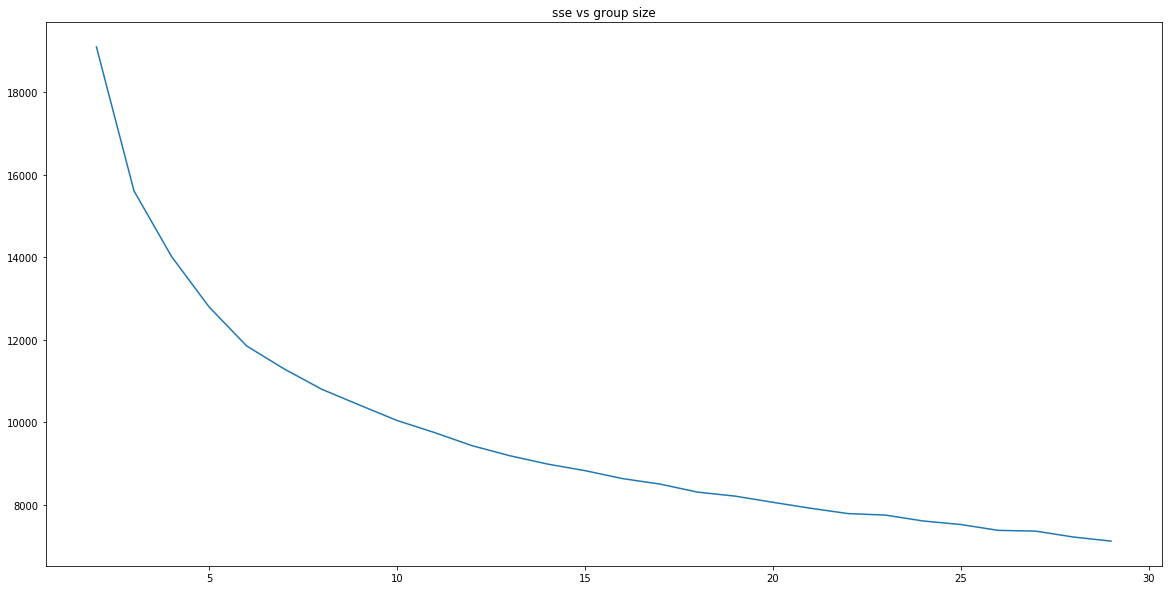

In [31]:
def sse_curve_data(data, cols, group_sizes=[i for i in range(2,30)]):
    sses = list()
    for g in group_sizes:
        res = KMeans(n_clusters=g, random_state=23).fit(data[cols])
        sses.append(res.inertia_)
    return sses

sse_res = sse_curve_data(standardized_numerical, standardized_numerical.columns, [i for i in range(2,30)])
plt.figure(figsize=(20,10))
plt.plot([i for i in range(2,30)], sse_res)
plt.title('sse vs group size')



### Elbow technique
Visually, it is hard to see the elbow in the above diagram; however, I would say that at 15 groups, we have passed the elbow, so we will take a look at 10 groups.

In [63]:
kmeans_10 = KMeans(n_clusters=10, random_state=23).fit(standardized_numerical)

In [64]:
combined_espn.columns

Index(['PNAME', 'YEAR', 'GP', 'GS', 'MIN', 'FG', 'FG%', '3PT', '3P%', 'FT',
       'FT%', 'OR', 'DR', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS',
       'FIRST_NAME', 'LAST_NAME', 'RK', 'NAME', 'TEAM', 'SALARY', 'SALARY_M',
       'POSN', 'SAL_M_ADJ', 'SAL_M_ADJ2', 'cluster'],
      dtype='object')

In [65]:
labels_10 = kmeans_10.labels_

#print(np.unique(labels_10))

# add labels to complete dataset and investigate each group (see if there are any differences with salary)
combined_espn['cluster'] = labels_10

# Investigate
# combined_espn[combined_espn.cluster == 1].head()

# cluster sizes
print('cluster sizes:', [combined_espn[combined_espn.cluster == i].shape[0] for i in range(10)])

# median salaries
print('cluster median salary ($ mil):', [combined_espn[combined_espn.cluster == i].SALARY_M.median() for i in range(10)])

# mode position
print('cluster mode position:', [combined_espn[combined_espn.cluster == i].POSN.mode()[0] for i in range(10)])

# could compare the differences between similar position groups

# 
print('cluster median mins:', [combined_espn[combined_espn.cluster == i].MIN.median() for i in range(10)])

cluster sizes: [88, 300, 120, 58, 356, 103, 278, 165, 146, 169]
cluster median salary ($ mil): [9.026, 1.639, 18.417, 1.275, 3.5534999999999997, 4.062, 3.838, 3.95, 1.9700000000000002, 7.0]
cluster mode position: ['C', 'SG', 'PF', 'SG', 'SG', 'C', 'SG', 'PF', 'C', 'PG']
cluster median mins: [33.0, 15.5, 34.0, 7.1, 24.7, 28.1, 31.7, 26.4, 16.9, 34.4]


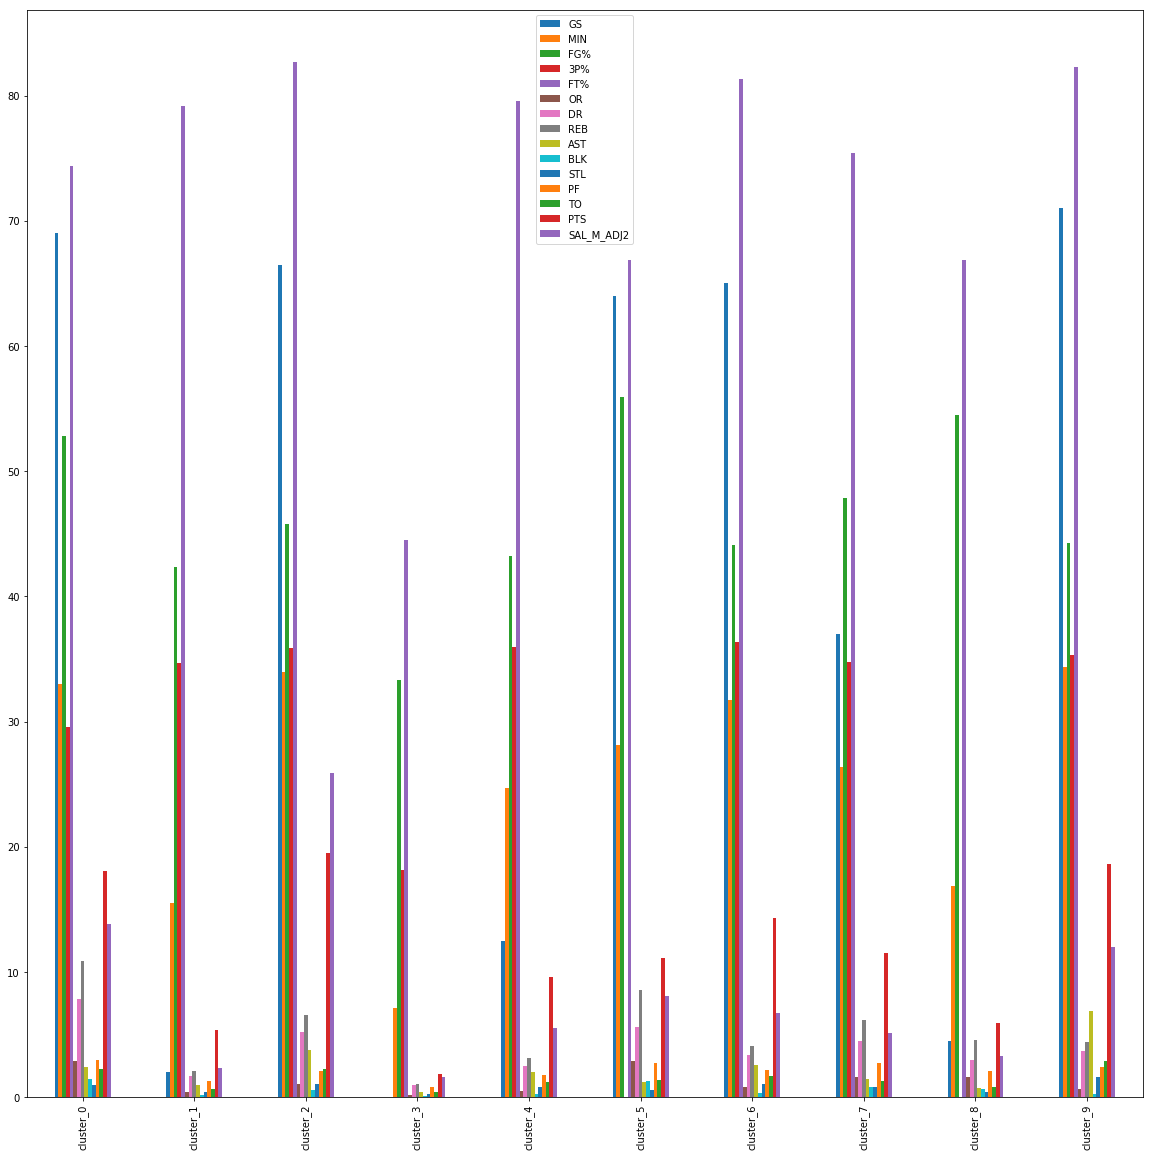

In [66]:
combined_espn[combined_espn.cluster == 0][num_cols].median(axis=0)

# create a dataframe
# row: stat
# column: cluster number

cluster_summary = pd.DataFrame({})

for i in range(10):
    cluster_summary['cluster_'+str(i)] = combined_espn[combined_espn.cluster == i][num_cols+['SAL_M_ADJ2']].median(axis=0)
    
cluster_summary.transpose().plot.bar(figsize=(20,20))


In [67]:
combined_espn[combined_espn.cluster == 5].PNAME.unique().size

36

In [68]:
cluster_summary.round(2)

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
GS,69.00,2.00,66.50,0.00,12.50,64.00,65.00,37.00,4.50,71.00
MIN,33.00,15.50,34.00,7.10,24.70,28.10,31.70,26.40,16.90,34.40
FG%,52.85,42.35,45.80,33.30,43.20,55.90,44.15,47.90,54.50,44.30
3P%,29.55,34.65,35.85,18.15,36.00,0.00,36.40,34.80,0.00,35.30
FT%,74.40,79.20,82.70,44.55,79.60,66.90,81.35,75.40,66.85,82.30
OR,2.90,0.40,1.10,0.20,0.50,2.90,0.80,1.60,1.60,0.70
DR,7.85,1.70,5.25,0.95,2.50,5.60,3.40,4.50,2.95,3.70
REB,10.90,2.10,6.60,1.05,3.10,8.60,4.10,6.20,4.60,4.40
AST,2.40,1.00,3.75,0.45,2.00,1.20,2.60,1.50,0.75,6.90
BLK,1.45,0.20,0.55,0.10,0.30,1.30,0.35,0.80,0.70,0.30


### Notes
- cluster 2 has the highest median adjusted salary
    - has the highest points scored
    - fourth best free throw percentage
    - not the best 3-point percentage or field goal percentage
    - second highest assists
    - low blocks
    - average rebounds
    - not most games and not most games started

In [69]:
# let's look at the distributions of cluster 2
cluster_2 = combined_espn[combined_espn.cluster == 2]
cluster_2.PNAME.unique()

array(['damian-lillard', 'jimmy-butler', 'stephen-curry',
       'andre-iguodala', 'khris-middleton', 'rudy-gay', 'victor-oladipo',
       'chris-paul', 'bradley-beal', 'aaron-gordon', 'andrew-wiggins',
       'kevin-love', 'nicolas-batum', 'jayson-tatum', 'nikola-jokic',
       'kevin-durant', 'kyrie-irving', 'blake-griffin', 'brook-lopez',
       'marc-gasol', 'paul-george', 'mike-conley', 'kawhi-leonard',
       'danilo-gallinari', 'carmelo-anthony', 'harrison-barnes',
       'russell-westbrook', 'derrick-rose', 'al-horford', 'paul-millsap',
       'gordon-hayward', 'tobias-harris', 'thaddeus-young'], dtype=object)

In [70]:
cluster_2.columns

Index(['PNAME', 'YEAR', 'GP', 'GS', 'MIN', 'FG', 'FG%', '3PT', '3P%', 'FT',
       'FT%', 'OR', 'DR', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS',
       'FIRST_NAME', 'LAST_NAME', 'RK', 'NAME', 'TEAM', 'SALARY', 'SALARY_M',
       'POSN', 'SAL_M_ADJ', 'SAL_M_ADJ2', 'cluster'],
      dtype='object')

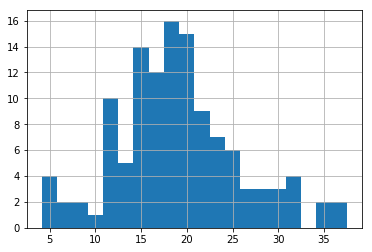

In [71]:
cluster_2.SALARY_M.hist(bins=20)

Text(0.5,0.98,'Cluster 2 Positions')

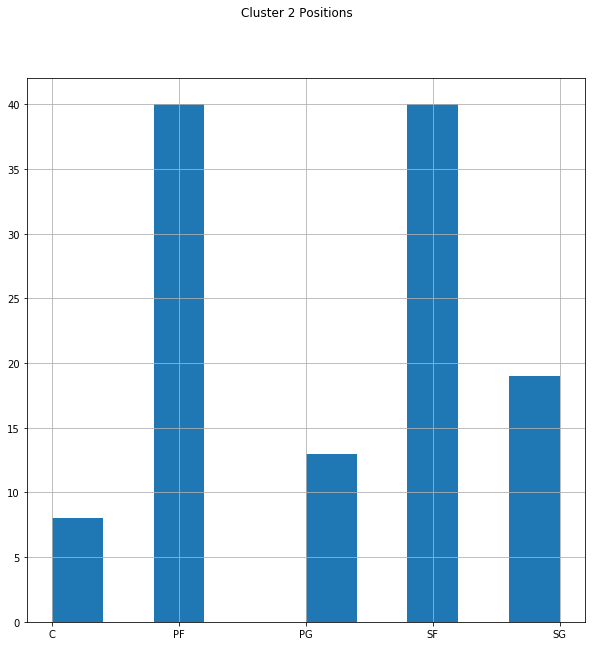

In [87]:
import pylab as pl
pl.figure(figsize=(10,10))
cluster_2.POSN.hist()
pl.suptitle('Cluster 2 Positions')


In [73]:
cluster_1 = combined_espn[combined_espn.cluster == 1]
cluster_9 = combined_espn[combined_espn.cluster == 9]



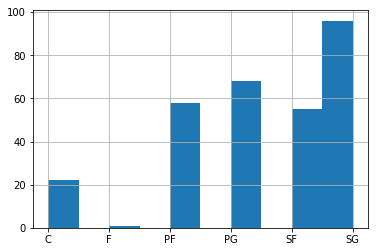

In [74]:
cluster_1.POSN.hist()

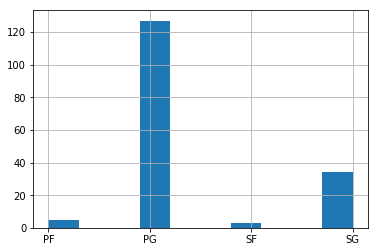

In [75]:
cluster_9.POSN.hist()

look at differences between the lowest 10% and highest 10% in cluster

In [76]:
sal_10p, sal_90p =  np.percentile(cluster_2.SALARY_M.values, [10,90])
print(sal_10p, sal_90p)

11.7185 28.570800000000002


In [77]:
# compare stats for averages of each group
cluster_2[cluster_2.SALARY_M <= sal_10p].mean(axis=0)
cluster_2[cluster_2.SALARY_M >= sal_90p].mean(axis=0)
# column for relative differences

# create dataframe for comparison

YEAR          2018.666667
GP              54.166667
GS              48.250000
MIN             30.641667
FG%             44.975000
3P%             34.400000
FT%             83.308333
OR               1.050000
DR               4.766667
REB              5.808333
AST              4.666667
BLK              0.425000
STL              1.033333
PF               2.258333
TO               2.408333
PTS             18.525000
RK               4.916667
SALARY_M        32.718500
SAL_M_ADJ       33.573219
SAL_M_ADJ2      34.382635
cluster          2.000000
dtype: float64

In [78]:
combined_espn.YEAR.max()

2019

### Analyze/Cluster players based on position

In [79]:
# posn's ['PG', 'SF', 'SG', 'PF', 'C', 'F']
pgs = combined_espn[combined_espn.POSN=='PG']
sgs = combined_espn[combined_espn.POSN=='SG']
sfs = combined_espn[combined_espn.POSN=='PF']
pfs = combined_espn[combined_espn.POSN=='SF']
cs = combined_espn[combined_espn.POSN=='C']
fs = combined_espn[combined_espn.POSN=='F']

In [80]:
combined_espn.POSN.unique()

array(['PG', 'SF', 'SG', 'PF', 'C', 'F'], dtype=object)

In [81]:
pgs.describe()

,YEAR,GP,GS,MIN,FG%,3P%,FT%,OR,DR,REB,...,BLK,STL,PF,TO,PTS,RK,SALARY_M,SAL_M_ADJ,SAL_M_ADJ2,cluster
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,2015.578534,56.921466,37.028796,26.804188,43.450000,34.114921,78.735079,0.630366,2.710209,3.337435,...,0.252094,1.081414,1.956545,1.965183,12.897382,204.759162,7.082018,7.540727,9.551271,5.369110
std,3.019249,21.689145,30.191110,7.682921,4.012499,6.497051,11.853995,0.357697,1.261701,1.523632,...,0.176978,0.523460,0.620809,0.962863,6.210375,141.660826,7.313895,7.636698,9.030217,2.992973
min,2006.000000,3.000000,0.000000,5.200000,23.400000,0.000000,0.000000,0.000000,0.300000,0.700000,...,0.000000,0.100000,0.200000,0.200000,1.200000,1.000000,0.016000,0.017029,0.018756,0.000000
25%,2014.000000,43.000000,5.000000,21.425000,41.400000,31.525000,75.050000,0.400000,1.800000,2.200000,...,0.100000,0.700000,1.500000,1.200000,8.125000,83.000000,1.634000,1.748997,2.497985,4.000000
50%,2016.000000,62.500000,36.000000,28.650000,43.550000,35.250000,80.600000,0.600000,2.600000,3.200000,...,0.200000,1.000000,2.000000,1.900000,11.950000,194.000000,3.748500,4.161636,6.026833,5.000000
75%,2018.000000,75.750000,67.000000,33.000000,46.000000,37.775000,85.700000,0.800000,3.500000,4.200000,...,0.300000,1.400000,2.400000,2.600000,17.175000,302.750000,11.278250,11.847993,14.232052,9.000000
max,2019.000000,82.000000,82.000000,38.500000,58.000000,51.900000,100.000000,2.200000,9.600000,11.100000,...,1.100000,2.800000,3.600000,5.400000,31.600000,655.000000,37.457000,39.046375,41.833349,9.000000


## Question:

1. What are the principal components of the player data?

### PCA
Look into the principal components of the data

In [51]:
# from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import pprint

In [52]:
n_components = 8
pca = PCA(n_components = n_components)

a = pca.fit_transform(standardized_numerical)

print(pca.explained_variance_ratio_)
print('sum:',np.sum(pca.explained_variance_ratio_))

[0.42417031 0.2189328  0.06948875 0.05267666 0.04280127 0.03883923
 0.03110294 0.02967003]
sum: 0.9076820059505788


In [53]:
standardized_numerical.columns

Index(['GS_SD', 'MIN_SD', 'FG%_SD', '3P%_SD', 'FT%_SD', 'OR_SD', 'DR_SD',
       'REB_SD', 'AST_SD', 'BLK_SD', 'STL_SD', 'PF_SD', 'TO_SD', 'PTS_SD',
       'SAL_M_ADJ2_SD'],
      dtype='object')

Notes:
- explaining more than 90% of the variation in the data

Text(0.5,1,'Principal Component Correlation Matrix')

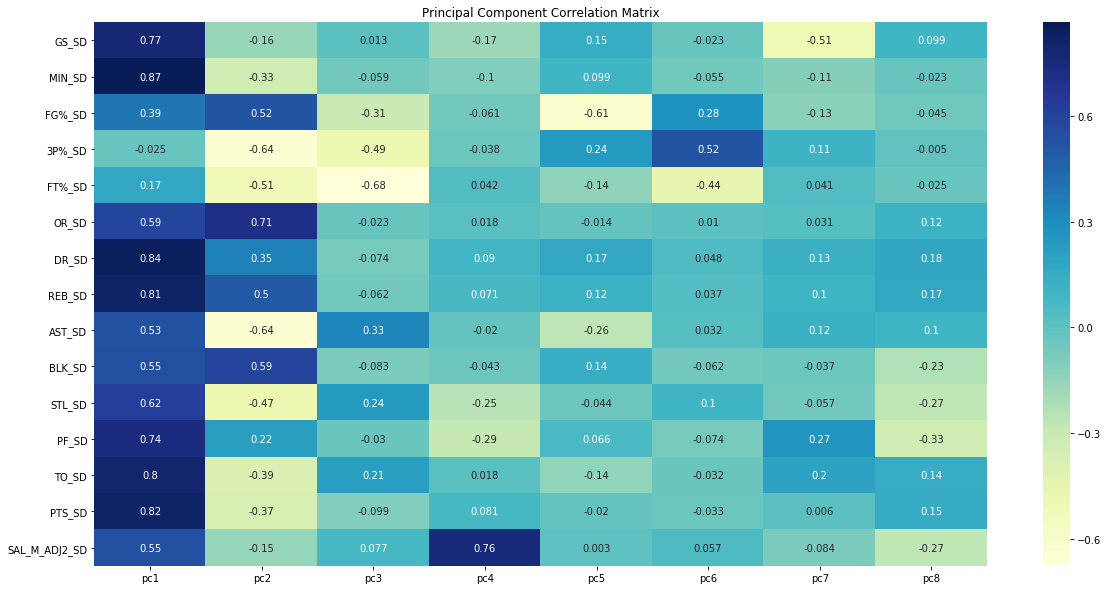

In [88]:
import seaborn as sns

a = pca.components_.T * np.sqrt(pca.explained_variance_)
np.sum(np.round(a,3), axis=1)
np.round(a,3)

loadings = pd.DataFrame(a).round(3)
loadings.index = standardized_numerical.columns
loadings.columns = ['pc'+str(i+1) for i in range(n_components)]
# loadings

fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(ax=ax,data=loadings, annot=True, cmap="YlGnBu")
ax.set_title('Principal Component Correlation Matrix')

Notes:
- pc1
    - lots of highly positively correlated variables > 0.7:
        - games started
        - minutes
        - deffensive rebounds
        - rebounds
        - personal fouls
        - turnovers 
        - points
    - this best describes the factors that distinguish the key players
        - great players play a lot, score a lot, and get turnovers/fouls
    - also worth noting that Salary has a 0.5 correlation
- pc2
    - correlated variables >0.5:
        - offensive rebounds
        - rebounds
        - blocks
        - field goal percentage
    - negatively correlated variables <-0.5:
        - 3PT percentage
        - FT%
        - Assists
-P
- pc4
    - Salary has a high correlation 0.76
        

In [55]:
np.round(pca.components_.T,3)

array([[ 0.306, -0.088,  0.012, -0.195,  0.182, -0.03 , -0.743,  0.148],
       [ 0.343, -0.182, -0.058, -0.118,  0.123, -0.072, -0.167, -0.034],
       [ 0.154,  0.289, -0.301, -0.068, -0.762,  0.365, -0.185, -0.068],
       [-0.01 , -0.35 , -0.478, -0.043,  0.3  ,  0.686,  0.157, -0.008],
       [ 0.069, -0.282, -0.663,  0.048, -0.171, -0.582,  0.061, -0.037],
       [ 0.235,  0.392, -0.023,  0.021, -0.018,  0.014,  0.045,  0.172],
       [ 0.334,  0.194, -0.073,  0.101,  0.219,  0.063,  0.186,  0.268],
       [ 0.322,  0.275, -0.06 ,  0.08 ,  0.152,  0.049,  0.15 ,  0.253],
       [ 0.212, -0.35 ,  0.324, -0.022, -0.327,  0.042,  0.182,  0.151],
       [ 0.218,  0.325, -0.081, -0.048,  0.175, -0.081, -0.054, -0.337],
       [ 0.247, -0.261,  0.24 , -0.279, -0.055,  0.132, -0.083, -0.406],
       [ 0.292,  0.122, -0.029, -0.327,  0.082, -0.097,  0.393, -0.495],
       [ 0.315, -0.213,  0.209,  0.02 , -0.178, -0.041,  0.292,  0.217],
       [ 0.324, -0.206, -0.097,  0.091, -0.025, -0.



### Further investigation
- Further investigation could be done into the ranks (have each cell be the row rank for the stat, e.g. each row has numbers 0 to 9). Alternatively, we could normalize all the rows and plot the heatmap

### Heatmap visualization

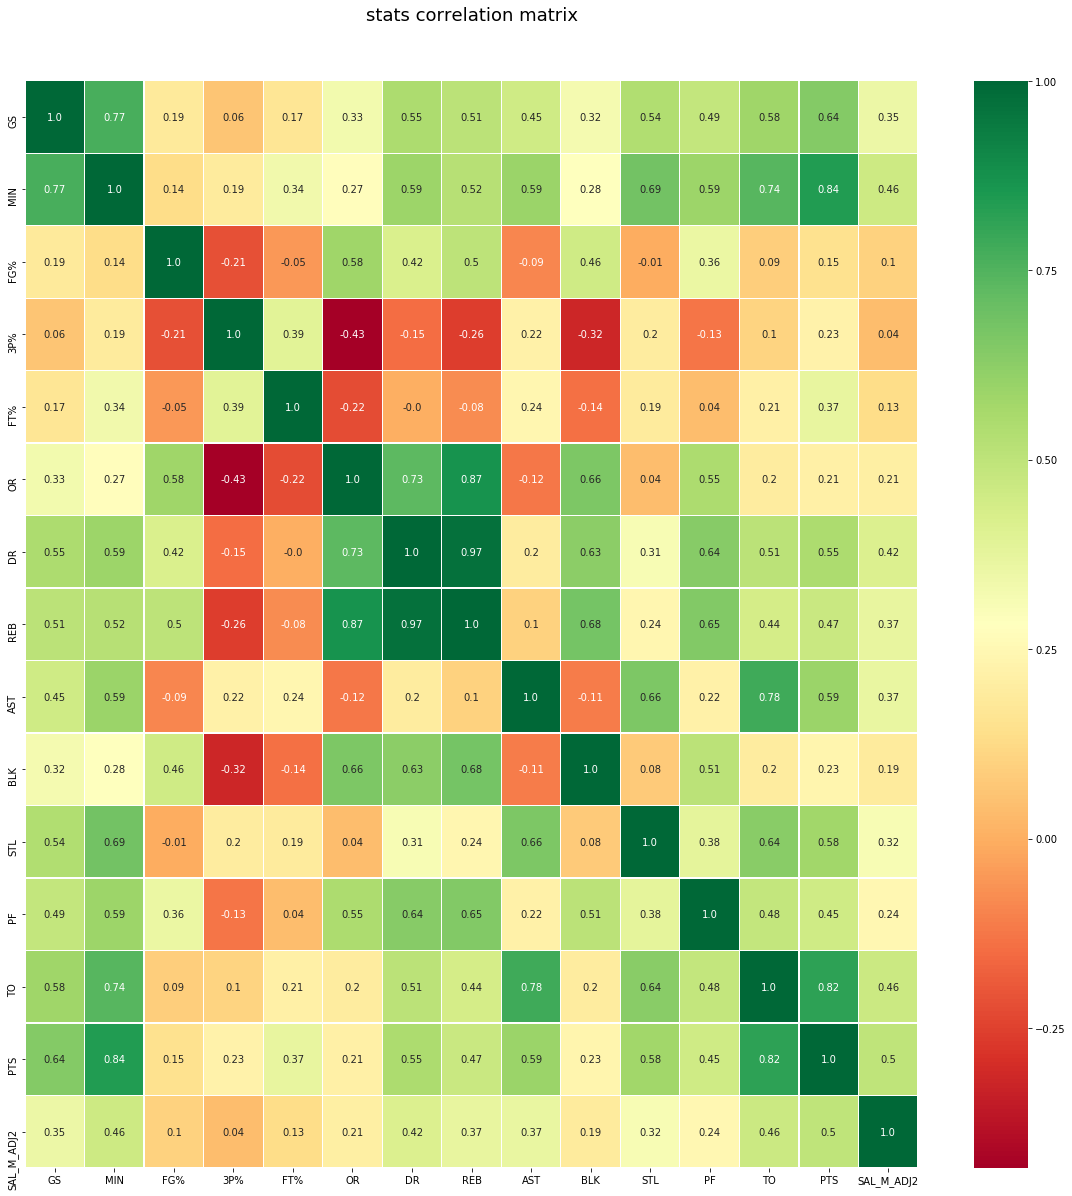

In [56]:
import seaborn as sns

corr_mat = combined_espn[norm_cols].corr()


fig, ax = plt.subplots(figsize=(20,20))
plt.title('stats correlation matrix', fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(corr_mat, annot=corr_mat.round(2).values, fmt="", cmap="RdYlGn", linewidths=0.30, ax=ax)

plt.show()


### Notes:
- Salary is highest correlated with minutes, rebounds, turnovers (?), and points
- why is Salary correlated with turnovers?
    - turnovers and points are highly correlated

### Official Player Data

In [57]:
official_data = pd.read_csv('../Datasets/nba_player_stats_official.csv')



In [58]:
official_data.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS', 'year'],
      dtype='object')